<a href="https://colab.research.google.com/github/CJRicciardi/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd

In [0]:
#hopefully ignoring the directions to practice for loops is acceptable.  
#since I showed all of the hard work the directions are getting at.

sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

mean = sales.sum()/sales.size

meansquared = np.array([(n-mean)**2 for n in sales])

meansum = meansquared.sum()

variance = meansum/(sales.size-1)

std = variance**(0.5)

print('Mean:', mean)
print('Variance:', variance)
print('Standard Deviation:', std)

Mean: 3052.714285714286
Variance: 214387.90476190473
Standard Deviation: 463.0204150595357


In [0]:
np.mean(sales)

3052.714285714286

In [0]:
np.var(sales,ddof=1)

214387.90476190473

In [0]:
np.std(sales,ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
salescustomers = np.array([[3505, 2400, 3027, 2798, 3700, 3250, 2689],
                           [127, 80, 105, 92, 120, 115, 93]])

covariance = np.cov(salescustomers)

covariance

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
customers = np.array([[127, 80, 105, 92, 120, 115, 93]])

cmean = customers.sum()/customers.size

cmsquared = np.array([(c-cmean)**2 for c in customers])

cmsum = cmsquared.sum()

cvariance = cmsum/(customers.size-1)

cstd = cvariance**0.5


print('Customer Mean:', cmean)
print('Customer Variance:', cvariance)
print('Customer Standarad Deviation:', cstd)

cc = [v/(cstd*std) for v in covariance]

print('Correlation Coeficient:', cc)

Customer Mean: 104.57142857142857
Customer Variance: 290.95238095238096
Customer Standarad Deviation: 17.057326313123664
Correlation Coeficient: [array([27.14495851,  0.96283398]), array([0.96283398, 0.03683925])]


In [0]:
np.mean(customers)

104.57142857142857

In [0]:
np.var(customers, ddof=1)

290.95238095238096

In [0]:
np.std(customers, ddof=1)

17.057326313123664

In [0]:
#sales_data = np.array([sales, customers])

sales_df = pd.DataFrame(data=salescustomers, index=('sales', 'customers')).T
                        #columns=[sales, customers])
                        #{'sales': sales, 'customers': customers})

#sales_df = sales_df.columns(np.array(['sales', 'customers']))

sales_df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

titan = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titan.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titan.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
titan.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

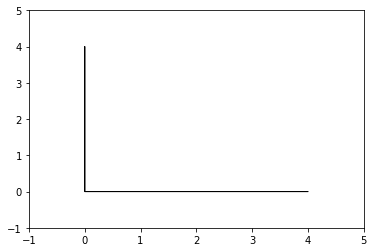

In [0]:
#x = [5,0,0]
#y = [0,5,0]

import matplotlib.pyplot as plt

plt.xlim(-1,5)
plt.ylim(-1,5)

plt.arrow(0,0,4,0)
plt.arrow(0,0,0,4)
plt.show();



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# vectors are orthogonal if their dot product is zero
# the dot product is: not zero

(-5)*6 + 3*(-8) + 7*2

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# ||c||^2 = 

2**2 + (-15)**2 + 6**2 + 20**2

665

In [0]:
# c (dot) c = see above and below

2*2 + -15*-15 + 6*6 + 20*20

665

In [0]:
# for real though these are all asking the same thing.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7 \hat{i} + 12 \hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2 \hat{i} + 11 \hat{j} - 8 \hat{k} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
a = 1/np.sqrt(4**2 + 12**2 + 11**2 + 9**2 + 2**2)
np.array([a*4, a*12, a*11, a*9, a*2])

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

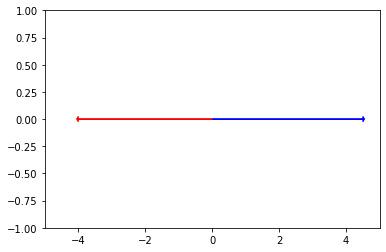

In [0]:
plt.xlim(-5,5)
plt.ylim(-1,1)

plt.arrow(0,0,-4,0, color='r', head_width=0.05, head_length=0.05)
plt.arrow(0,0,4.5,0, color='b', head_width=0.05, head_length=0.05)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

\begin{align}
\infty 1d
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

\begin{align}
O = \begin{bmatrix} 1 & -1 & 4 \\ 2 & 0 & 8 \\ 3 & 7 & 2 \end{bmatrix} = \begin{bmatrix} 1 & -1 & 4 \\ 0 & -2 & 0 \\ 3 & 7 & 2 \end{bmatrix} = \begin{bmatrix} 1 & -1 & 4 \\ 0 & -2 & 0 \\ 0 & 10 & -10 \end{bmatrix} = \begin{bmatrix} 1 & -1 & 4 \\ 0 & -2 & 0 \\ 0 & 0 & -10 \end{bmatrix}
\end{align}

\begin{align} Span = \infty 3d \end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


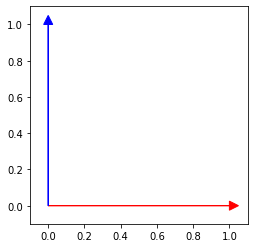

In [0]:
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.arrow(0,0,1,0, color='r', head_width=0.05, head_length=0.05)
plt.arrow(0,0,0,1, color='b', head_width=0.05, head_length=0.05)

plt.axes().set_aspect('equal')
plt.show();

## 6.2 What does it mean to form a basis?

Combining sets of lineally independent vectors in order to form space $\mathbb{R}^n$ where *n* is the number of dimensions.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 1 & 2 & 3 \\ -1 & 0 & 7 \\4 & 8  & 2 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ -1 & 0 & 7 \\ 0 & 8  & 30 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 0 & 2 & 10 \\ 0 & 8  & 30 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & 5 \\ 0 & 8  & 30 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & 5 \\ 0 & 0  & -10 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & 5 \\ 0 & 0  & 1 \end{bmatrix} 
\end{align}

> Thus the rank is 3.





## 7.2 What does the rank of a matrix tell us?

This rank tells us what the span of a matrix is.  in the above case, it is $\mathbb{R}^3$.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$
\begin{align}
proj_{L}(w) = \begin{bmatrix} \frac{1}{2} & \frac{3}{2} \end{bmatrix}
\end{align}

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


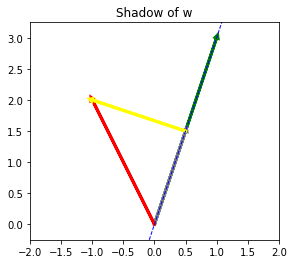

In [0]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-0.25,3.25)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [1/2,3/2]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.axes().set_aspect('equal')
#plt.plot(1, 3, '--', color='b', linewidth=1)
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(1/2, 3/2, -3/2, 1/2, linewidth=3, head_width=.05, head_length=0.05, color ='yellow')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

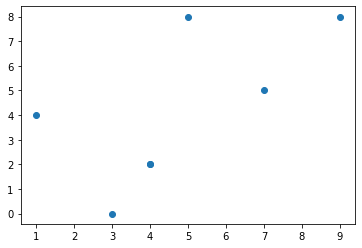

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()